<a href="https://colab.research.google.com/github/kimheeseo/2019_AJOU_multimedia_engineering/blob/main/SPA%EC%97%B0%EC%8A%B5_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8(2022.11.01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from scipy import io
parity=io.loadmat('/content/parity.mat')
#parity=io.loadmat('/content/pari.mat')

In [ ]:
parity

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov  1 17:23:14 2022',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[1, 2, 3]], dtype=uint8)}

In [ ]:
print('parity type',type(parity))
parity2=parity['a'] #parity 위치
parity2=parity2-1
print('parity 위치', parity2)

parity type <class 'dict'>
parity 위치 [[0 1 2]]


In [ ]:
information=io.loadmat('/content/information.mat')
#information=io.loadmat('/content/infor.mat')
print(information)

print('information type',type(information))
information2=information['d'] # information 위치

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov  1 17:22:42 2022', '__version__': '1.0', '__globals__': [], 'd': array([[4, 5, 6, 7, 8]], dtype=uint8)}
information type <class 'dict'>


In [ ]:
information2=information2-1
print('information 위치', information2)
rank=3

information 위치 [[3 4 5 6 7]]


In [ ]:
N=8
import numpy as np
codeword=np.zeros((N,1))
codeword=codeword.reshape(codeword.shape[1],codeword.shape[0])
codeword.shape

(1, 8)

In [ ]:
information2.shape

(1, 5)

In [ ]:
parity2.shape

(1, 3)

In [ ]:
codeword=np.array(codeword)
codeword.shape

(1, 8)

In [ ]:
parity2.shape[1]

3

In [ ]:
for i in range(0, parity2.shape[1]):
  codeword[0,(parity2[0,i])-1]=1

In [ ]:
codeword

array([[1., 1., 0., 0., 0., 0., 0., 1.]])

In [ ]:
import pandas as pd
df = pd.DataFrame(codeword)

In [ ]:
parity2

array([[0, 1, 2]], dtype=uint8)

**Parity Bit 위치에 1, Information Bit 위치에 0**

In [ ]:
H = pd.read_csv('/content/H.CSV')
H

,pcm,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,0,1,0,1,1,0,0,1
1,1,1,1,0,0,1,0,0
2,0,0,1,0,0,1,1,1
3,1,0,0,1,1,0,1,0


In [ ]:
sum(codeword)

array([1., 1., 0., 0., 0., 0., 0., 1.])

In [ ]:
codeword.shape

(1, 8)

In [ ]:
codeword=np.zeros((1,N))
codeword=codeword.reshape(codeword.shape[1],codeword.shape[0])
H.shape

(4, 8)

# **syndrome test**

In [ ]:
syndrome=H.dot(codeword)%2
syndrome

,0
0,0.0
1,0.0
2,0.0
3,0.0


In [ ]:
H=H.to_numpy() #DataFrame => numpy

In [ ]:
H

array([[0, 1, 0, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 0, 1, 0]])

In [ ]:
codeword.shape

(8, 1)

In [ ]:
sum(codeword)

array([0.])

# **BPSK**

In [ ]:
codeword2=np.zeros((N,1))

for i in range(0,N):
  if codeword[i,0] == 1:
    codeword2[i,0] = -1
  else :
    codeword2[i,0] = 1


In [ ]:
codeword2

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

# **dB & SNRpbit**

In [ ]:
dB=np.array([0, 0.25, 0.5,0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
db_len=dB.size
[N1, N2]=H.shape
print('N1값',N1, 'N2값',N2, '\n')

SNRpbit=10**(dB/10)

print('SNRpbit값',SNRpbit)

N1값 4 N2값 8 

SNRpbit값 [1.         1.05925373 1.12201845 1.18850223 1.25892541 1.33352143
 1.41253754 1.49623566 1.58489319 1.67880402 1.77827941]


# **No_uncoded & No**

In [ ]:
No_uncoded=1/SNRpbit
print('No_uncoded값',No_uncoded)
R=(N2-3)/N2 # code rate
print('code rate값',R)

No_uncoded값 [1.         0.94406088 0.89125094 0.84139514 0.79432823 0.74989421
 0.70794578 0.66834392 0.63095734 0.59566214 0.56234133]
code rate값 0.625


In [ ]:
No=No_uncoded/R;
print('R값',R,'\n')
print('No값',No,'\n')
blockerrors=0; biterrors=0; block=0; Errors=0; maximum_blockerror=10; iteration=20;
import sympy

R값 0.625 

No값 [1.6        1.5104974  1.4260015  1.34623223 1.27092518 1.19983073
 1.13271326 1.06935027 1.00953175 0.95305943 0.89974612] 



In [ ]:
K=4
N=8
message_matrix=np.zeros((K,N))
message_chk_to_var=np.zeros((K,N)) #Message_CHK_to_VAR=zeros(K,N)
LLR2=np.zeros((1,N))

print('message_matrix값 \n',message_matrix)

message_matrix값 
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
for i in range(0,N) :
  for j in range(0,K) :
      message_matrix[j,i]=LLR[i]
print('message_matrix값 \n',message_matrix)
A=np.zeros((N,2),dtype='int')
B=np.zeros((K,4),dtype='int')

for i in range(0,N):
  A[i,:]=A[i,:]+(np.where(H[:,i]==1)) # A{i}=find(H(:,i)==1);

for j in range(0,K):
  B[j,:]=B[j,:]+(np.where(H[j,:]==1)) # B{j}=find(H(j,:)==1);

print('B값',B)
print('A값',A)

message_matrix값 
 [[-1.19078137  2.51059213  8.70238401  7.60564235  1.92139162 -0.31118196
   5.65823683 -3.0685761 ]
 [-1.19078137  2.51059213  8.70238401  7.60564235  1.92139162 -0.31118196
   5.65823683 -3.0685761 ]
 [-1.19078137  2.51059213  8.70238401  7.60564235  1.92139162 -0.31118196
   5.65823683 -3.0685761 ]
 [-1.19078137  2.51059213  8.70238401  7.60564235  1.92139162 -0.31118196
   5.65823683 -3.0685761 ]]
B값 [[1 3 4 7]
 [0 1 2 5]
 [2 5 6 7]
 [0 3 4 6]]
A값 [[1 3]
 [0 1]
 [1 2]
 [0 3]
 [0 3]
 [1 2]
 [2 3]
 [0 2]]


In [ ]:
BB=np.zeros((K, N))
AA=np.zeros((K, B.shape[1]))
AA2=np.zeros((N, A.shape[1]))
AA3=np.zeros((1, N))
AA4=np.zeros((1, N))
MM=np.zeros((K,B.shape[1]))
E=np.zeros((N, A.shape[1]))
E1=np.zeros((N, A.shape[1]))

In [ ]:
j=0
for k in range(0, B.shape[1]) :
  AA[j, k]=message_matrix[j, B[j,k]] / 2 
  AA[j, k]=np.tanh(AA[j, k])
MM[j,:]=np.prod(AA[j, :],axis=0)/AA[j, :]
MM[0,:]

array([0.73707561, 0.97281384, 0.72276877, 0.7213442 ])

In [ ]:
aa=1+MM[j,:]
print('aa값',aa)
bb=1-MM[j,:]
print('bb값',bb)

j=0
for k in range(0, B.shape[1]) :
  bb[bb==0]=1e-09
  aa[aa==0]=1e-09
  message_chk_to_var[j,B[j,k]]=math.log(aa[k]/bb[k])
  print(math.log(aa[k]/bb[k]))

message_chk_to_var

aa값 [1.73707561 1.97281384 1.72276877 1.7213442 ]
bb값 [0.26292439 0.02718616 0.27723123 0.2786558 ]
1.8880917800223909
4.284508150796711
1.8268361133089988
1.820883439910544


array([[0.        , 1.88809178, 0.        , 4.28450815, 1.82683611,
        0.        , 0.        , 1.82088344],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [ ]:
for j in range(0,K):
  for k in range(0, B.shape[1]) :
    AA[j, k]=message_matrix[j, B[j,k]] / 2  # B_j = B{j};
    AA[j, k]=np.tanh(AA[j, k]) # tanh(Message_matrix(j,B_j)/2)

  MM[j,:]=np.prod(AA[j, :],axis=0)/AA[j, :]
  aa=1+MM[j,:]
  bb=1-MM[j,:]

  for k in range(0, B.shape[1]) :
    bb[bb==0]=1e-09
    aa[aa==0]=1e-09
    message_chk_to_var[j,B[j,k]]=math.log(aa[k]/bb[k])
message_chk_to_var    

array([[ 0.        ,  1.88809178,  0.        ,  4.28450815,  1.82683611,
         0.        ,  0.        ,  1.82088344],
       [-0.9348791 , -0.95907181, -1.83611446,  0.        ,  0.        ,
         1.34611675,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.90623529,  0.        ,  0.        ,
         1.38665727, -0.95849183, -0.9596782 ],
       [ 1.89153836,  0.        ,  0.        ,  6.11900516,  1.89965243,
         0.        ,  1.88977584,  0.        ]])

In [ ]:
for i in range(0, K):
  for j in range(0,N):
    if message_chk_to_var[i,j]>100 :
      message_chk_to_var[i,j]=100

  for i in range(0, K):
    for j in range(0,N):
      if message_chk_to_var[i,j]<-100 :
        message_chk_to_var[i,j]=-100
print('message_chk_to_var값',message_chk_to_var)

message_chk_to_var값 [[ 0.          1.88809178  0.          4.28450815  1.82683611  0.
   0.          1.82088344]
 [-0.9348791  -0.95907181 -1.83611446  0.          0.          1.34611675
   0.          0.        ]
 [ 0.          0.         -1.90623529  0.          0.          1.38665727
  -0.95849183 -0.9596782 ]
 [ 1.89153836  0.          0.          6.11900516  1.89965243  0.
   1.88977584  0.        ]]


In [ ]:
print('message_chk_to_var값',message_chk_to_var)
print('A[0,:]값 : ',A[0,:])

j=0

message_chk_to_var값 [[ 0.          1.88809178  0.          4.28450815  1.82683611  0.
   0.          1.82088344]
 [-0.9348791  -0.95907181 -1.83611446  0.          0.          1.34611675
   0.          0.        ]
 [ 0.          0.         -1.90623529  0.          0.          1.38665727
  -0.95849183 -0.9596782 ]
 [ 1.89153836  0.          0.          6.11900516  1.89965243  0.
   1.88977584  0.        ]]
A[0,:]값 :  [1 3]


In [ ]:
AA3=np.zeros((1, N))
for k in range(0, A.shape[1]) :
  AA3[j,0]+=message_chk_to_var[A[j,k],j]
j=0
print(message_chk_to_var[A[0,0],0])
print(A[0,0])
print(message_chk_to_var[A[0,1],0])
print(A[0,1])
print(AA3[j,0])

-0.9348790975688247
1
1.8915383593143529
3
0.9566592617455282


In [ ]:
message_chk_to_var

array([[ 0.        ,  1.88809178,  0.        ,  4.28450815,  1.82683611,
         0.        ,  0.        ,  1.82088344],
       [-0.9348791 , -0.95907181, -1.83611446,  0.        ,  0.        ,
         1.34611675,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.90623529,  0.        ,  0.        ,
         1.38665727, -0.95849183, -0.9596782 ],
       [ 1.89153836,  0.        ,  0.        ,  6.11900516,  1.89965243,
         0.        ,  1.88977584,  0.        ]])

In [ ]:
j=0
AA3=np.zeros((1, N))
for k in range(0, A.shape[1]) :
  AA3[j,0]+=message_chk_to_var[A[j,k],j]
for k in range(0, A.shape[1]) :
  E[j, k]=AA3[0,j]-message_chk_to_var[A[j,k],j]
print('AA3[j,0]값', AA3[j,0])
print('E[j, :]값',E[j, :])

AA3[j,0]값 0.9566592617455282
E[j, :]값 [ 1.89153836 -0.9348791 ]


In [ ]:
message_chk_to_var.shape

(4, 8)

In [ ]:
AA3=np.zeros((1, N))

for j in range(0, N) :
  for k in range(0, A.shape[1]) :
    AA3[0,j]+=message_chk_to_var[A[j,k],j]
  for k in range(0, A.shape[1]) :
    E[j, k]=AA3[0,j]-message_chk_to_var[A[j,k],j]
  for k in range(0, A.shape[1]) :
    message_matrix[A[j,k],j] = E[j,k] + LLR[j]
message_matrix    

array([[ 7.80275017,  3.51018857,  1.38968458,  8.02222472,  8.30316846,
        -1.9115499 ,  8.90057125,  6.34966533],
       [ 9.69428853,  6.35735216, -0.51655071,  1.90321956,  6.40351603,
        -0.52489264,  8.90057125,  7.30934353],
       [ 7.80275017,  4.46926038, -0.44642988,  1.90321956,  6.40351603,
        -0.56543316, 10.79034709,  9.13022697],
       [ 6.86787107,  4.46926038,  1.38968458,  6.18772771,  8.23035214,
        -1.9115499 ,  7.94207943,  7.30934353]])

In [ ]:
i=0
AA4=np.zeros((1, N))
for k in range(0, A.shape[1]) :
  AA4[0,i]+=message_chk_to_var[A[i,k],i]  
LLR2[0,i]=AA4[0,i]+LLR[i,0]
print(message_chk_to_var[1,0])
print(message_chk_to_var[3,0])
print(AA4[0,i])
print(LLR2[0,i])

-0.9348790975688247
1.8915383593143529
0.9566592617455282
8.759409427432367


# **SPA**

In [ ]:
def SPA(N, K, H, LLR, iteration) :
  message_matrix=np.zeros((K,N))
  message_chk_to_var=np.zeros((K,N)) #Message_CHK_to_VAR=zeros(K,N)
  LLR2=np.zeros((1,N))

  for i in range(0,N) :
    for j in range(0,K) :
        message_matrix[j,i]=LLR[i]

  A=np.zeros((N,2),dtype='int')
  B=np.zeros((K,4),dtype='int')

  for i in range(0,N):
    A[i,:]=A[i,:]+(np.where(H[:,i]==1)) # A{i}=find(H(:,i)==1);

  for j in range(0,K):
    B[j,:]=B[j,:]+(np.where(H[j,:]==1)) # B{j}=find(H(j,:)==1);

  BB=np.zeros((K, N))
  AA=np.zeros((K, B.shape[1]))
  AA2=np.zeros((N, A.shape[1]))
  AA3=np.zeros((1, N))
  AA4=np.zeros((1, N))
  MM=np.zeros((K,B.shape[1]))
  E=np.zeros((N, A.shape[1]))
  E1=np.zeros((N, A.shape[1]))

  for iiter in range(0,iteration):
    for j in range(0,K):
      for k in range(0, B.shape[1]) :
        AA[j, k]=message_matrix[j, B[j,k]] / 2  # B_j = B{j};
        AA[j, k]=np.tanh(AA[j, k]) # tanh(Message_matrix(j,B_j)/2)

      MM[j,:]=np.prod(AA[j, :],axis=0)/AA[j, :]
      aa=1+MM[j,:]
      bb=1-MM[j,:]
    
      for k in range(0, B.shape[1]) :
        bb[bb==0]=1e-09
        aa[aa==0]=1e-09
        message_chk_to_var[j,B[j,k]]=math.log(aa[k]/bb[k])
    #message_chk_to_var=np.clip(message_chk_to_var,-100,100)      
      
      for i in range(0, K):
        for j in range(0,N):
          if message_chk_to_var[i,j]>100 :
            message_chk_to_var[i,j]=100

      for i in range(0, K):
        for j in range(0,N):
          if message_chk_to_var[i,j]<-100 :
            message_chk_to_var[i,j]=-100
    AA3=np.zeros((1, N))

    for j in range(0, N) :
      for k in range(0, A.shape[1]) :
        AA3[0,j]+=message_chk_to_var[A[j,k],j]
      for k in range(0, A.shape[1]) :
        E[j, k]=AA3[0,j]-message_chk_to_var[A[j,k],j]
      for k in range(0, A.shape[1]) :
        message_matrix[A[j,k],j] = E[j,k] + LLR[j]
    AA4=np.zeros((1, N))
    for i in range(0,N) :
      for k in range(0, A.shape[1]) :
        AA4[0,i]+=message_chk_to_var[A[i,k],i]
      LLR2[0,i]=AA4[0,i]+LLR[i,0]
  return LLR2

# **main**

In [ ]:
import sympy
import math
BER=np.zeros((1,db_len))
for len in range(0,db_len):
  error=0
  blockerrors=0
  block=0

  qqw=np.zeros((1,information2.shape[1]))
  qqe=np.zeros((1,information2.shape[1]))
  while blockerrors < maximum_blockerror :

    sigma=math.sqrt(No[len]/2)
    tx=codeword2+sigma*np.random.randn(codeword2.shape[0],1)

    LLR=(2/sigma**2)*tx

    LLR2=SPA(N,K,H,LLR, iteration)
    new_codeword=np.sign(LLR2)
    
    new_codeword2=new_codeword.reshape(1, 8)
    codeword22=codeword
    codeword22=codeword22.reshape(1, 8)

    for i in range(0, information2.shape[1]) :
      qqw[0,i]=new_codeword2[0, information2[0,i]]

    for i in range(0, information2.shape[1]) :
      if qqw[0,i]>0 :
        qqw[0,i]=0
      else :
        qqw[0,i]=1    

    for i in range(0, information2.shape[1]) :
      qqe[0,i]=codeword22[0, information2[0,i]]
    error+=(~(qqw==qqe)).sum()      

    if (~(qqw==qqe)).sum() != 0 :
      blockerrors=blockerrors+1
      print('blockerrors값',blockerrors)
    block=block+1  
    print('error값',error)  
    print('ber값',error/(block* information2.shape[1]))  
  BER[0,len]=error/(block* information2.shape[1])

error값 0
ber값 0.0
error값 0
ber값 0.0
error값 0
ber값 0.0
error값 0
ber값 0.0
error값 0
ber값 0.0
error값 0
ber값 0.0
error값 0
ber값 0.0
error값 0
ber값 0.0
blockerrors값 1
error값 1
ber값 0.022222222222222223
blockerrors값 2
error값 3
ber값 0.06
error값 3
ber값 0.05454545454545454
error값 3
ber값 0.05
error값 3
ber값 0.046153846153846156
error값 3
ber값 0.04285714285714286
error값 3
ber값 0.04
error값 3
ber값 0.0375
error값 3
ber값 0.03529411764705882
error값 3
ber값 0.03333333333333333
blockerrors값 3
error값 5
ber값 0.05263157894736842
blockerrors값 4
error값 6
ber값 0.06
blockerrors값 5
error값 8
ber값 0.0761904761904762
error값 8
ber값 0.07272727272727272
error값 8
ber값 0.06956521739130435
error값 8
ber값 0.06666666666666667
error값 8
ber값 0.064
error값 8
ber값 0.06153846153846154
error값 8
ber값 0.05925925925925926
blockerrors값 6
error값 10
ber값 0.07142857142857142
error값 10
ber값 0.06896551724137931
blockerrors값 7
error값 11
ber값 0.07333333333333333
error값 11
ber값 0.07096774193548387
error값 11
ber값 0.06875
error값 11
ber값 0.06666666666

In [ ]:
BER

array([[0.068     , 0.0952381 , 0.06181818, 0.03939394, 0.07692308,
        0.05925926, 0.04197531, 0.02535211, 0.03529412, 0.02318841,
        0.03333333]])

In [ ]:
dB

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ])

BER값 
 [0.068, 0.0952381, 0.06181818, 0.03939394, 0.07692308, 0.05925926, 0.04197531, 0.02535211, 0.03529412, 0.02318841, 0.03333333]
dB값 
 [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5]


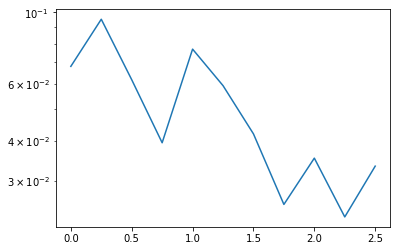

In [ ]:
import matplotlib.pyplot as plt
BER=[0.068     , 0.0952381 , 0.06181818, 0.03939394, 0.07692308,
        0.05925926, 0.04197531, 0.02535211, 0.03529412, 0.02318841,
        0.03333333]
print('BER값 \n',BER)
dB=[0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5]
print('dB값 \n',dB)
plt.semilogy(dB,BER)

\